Muenster TPC basic program for load in data from root tree
==========================================================

This notebook is a basic script to read in in rootfiles of the Muenster TPC processed with pax.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # ... and big plots

In [84]:
import hax
hax.config.CONFIG['main_data_paths'].append('/raid/xenon/MuensterTPC_2015/processed_files/DualPhase_Feb2016/Cs137/')
hax.runs.update_datasets()

In [85]:
dataset = 'Cs137.new.Thr3000ADC_160211'
data = hax.minitrees.load(dataset)

Found minitree at ./Cs137.new.Thr3000ADC_160211_Basics.root


In [99]:
data.(20)

,index,cs1,cs2,dataset_number,drift_time,event_number,event_time,largest_coincidence,largest_other_s1,largest_other_s2,largest_unknown,largest_veto,s1,s1_area_fraction_top,s2,s2_area_fraction_top,x,y,z
0,0,NaN,NaN,1602110000,NaN,0,1455200276000000000,0,772.073730,0,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,1602110000,NaN,1,1455200276000000000,0,678.334106,0,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,833.608582,8599.834961,1602110000,37764.703125,2,1455200277000000000,0,61.174324,0,25.934381,0,833.608582,0.302788,8599.834961,0.756876,-0.060613,-1.722840,NaN
3,3,670.642029,9735.352539,1602110000,28312.464844,3,1455200277000000000,0,208.437744,0,0.000000,0,670.642029,0.391652,9735.352539,0.710036,0.084590,-1.229748,NaN
4,4,82.729591,6354.825195,1602110000,10038.900391,4,1455200277000000000,0,0.000000,0,0.000000,0,82.729591,0.317004,6354.825195,0.774220,1.697110,-0.221896,NaN
5,5,696.061279,708.208435,1602110000,45408.902344,5,1455200277000000000,0,74.448792,0,0.000000,0,696.061279,0.180129,708.208435,0.858378,-0.427468,-1.753242,NaN
6,6,NaN,NaN,1602110000,NaN,6,1455200277000000000,0,438.029602,0,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,329.460052,21319.052734,1602110000,11652.034180,7,1455200277000000000,0,5.277885,0,0.000000,0,329.460052,0.363214,21319.052734,0.743271,-0.087364,-1.799491,NaN
8,8,NaN,NaN,1602110000,NaN,8,1455200277000000000,0,576.652588,0,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,NaN,NaN,1602110000,NaN,9,1455200277000000000,0,1075.139771,0,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
print(len(data))
len(data[data['s1'] > 0 ]) / len(data)

99876


0.3038667948255837

In [97]:
# Require a proper S1 + S2
xdata = data[data['s1'] > 0 ]
xdata = xdata[xdata['s2'] > 0 ]
# how many percent have been cut?
len(xdata) / len(data)

0.3038667948255837

In [ ]:
class Ncontribut(hax.minitrees.TreeMaker):
    # Activate the required branch while reading in the ROOT file
    # If you're too lazy to specify this, just put '*', but your TreeMaker will run slow!
    extra_branches = ['peaks.n_hits']
    __version__ = '0.0.1'
    
    def extract_data(self, event):
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
        
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
        
        return dict(s1_n_hits=s1.n_hits,
                    s2_n_hits=s2.n_hits)

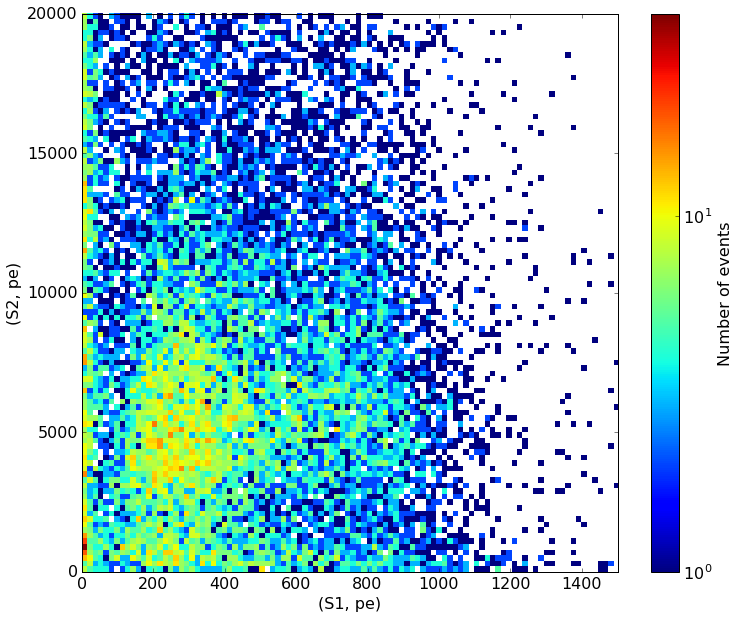

In [98]:

s1 = xdata['s1'].values
s2 = xdata['s2'].values
s2_other = xdata['largest_other_s2'].values
# Make an S1 vs S2 histogram
#plt.hist2d(np.log10(data['cs1']), np.log10(data['cs2']),
plt.hist2d(s1, s2,
           range=((0,1500), (0,20000)),
           bins=100, 
           norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
)
plt.colorbar(label='Number of events')
plt.xlabel('(S1, pe)')
plt.ylabel('(S2, pe)')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

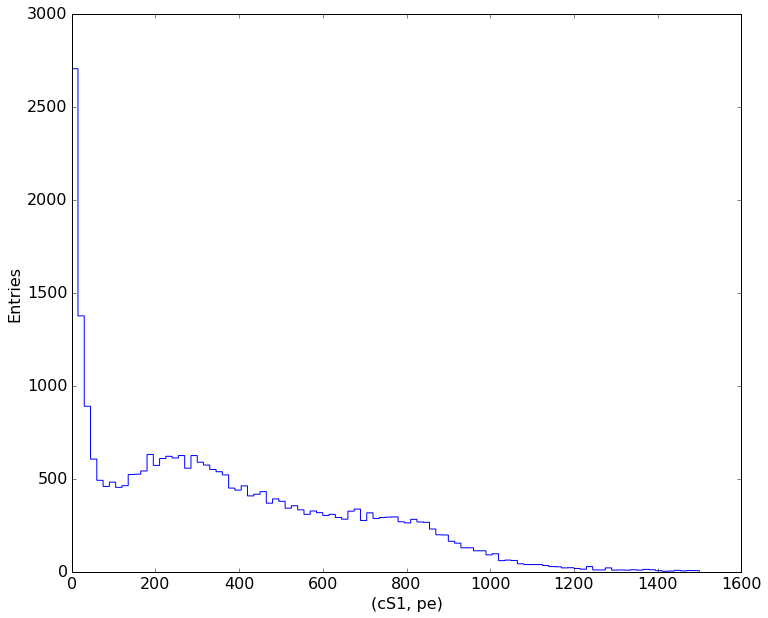

In [50]:
s1data = data[data['cs1'] > 0 ]
s1 = s1data['cs1'].values
plt.hist(s1,
           range=(0,1500),
           bins=100,
           histtype='step',
)
plt.xlabel('(cS1, pe)')
plt.ylabel('Entries')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

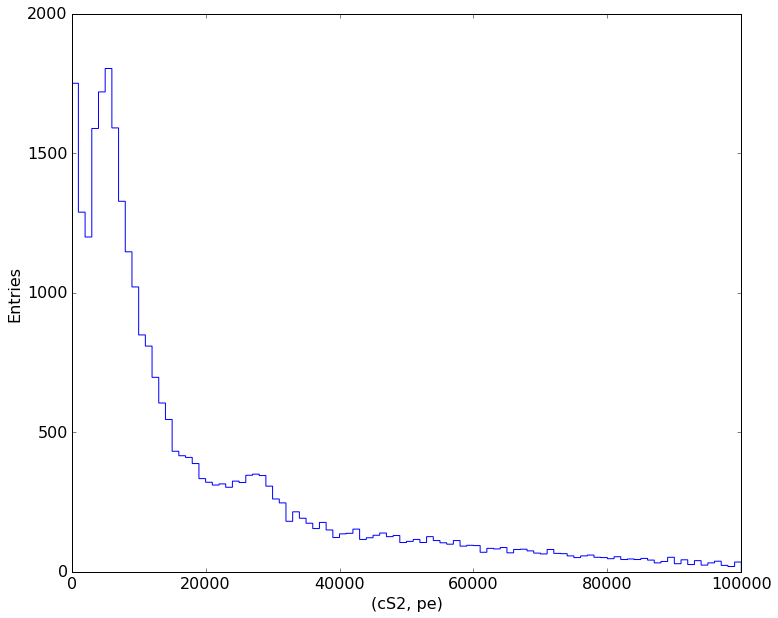

In [68]:
s2data = data[data['cs2'] > 0 ]
s2 = s2data['cs2'].values
plt.hist(s2,
           range=(0,1e5),
           bins=100,
           histtype='step',
)
plt.xlabel('(cS2, pe)')
plt.ylabel('Entries')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

In [61]:
xdata.head(10)

,index,cs1,cs2,dataset_number,drift_time,event_number,event_time,largest_coincidence,largest_other_s1,largest_other_s2,largest_unknown,largest_veto,s1,s1_area_fraction_top,s2,s2_area_fraction_top,x,y,z
2,2,833.608582,8599.834961,1602110000,37764.703125,2,1455200277000000000,0,61.174324,0.000000,25.934381,0,833.608582,0.302788,8599.834961,0.756876,-0.060613,-1.722840,NaN
3,3,670.642029,9735.352539,1602110000,28312.464844,3,1455200277000000000,0,208.437744,0.000000,0.000000,0,670.642029,0.391652,9735.352539,0.710036,0.084590,-1.229748,NaN
4,4,82.729591,6354.825195,1602110000,10038.900391,4,1455200277000000000,0,0.000000,0.000000,0.000000,0,82.729591,0.317004,6354.825195,0.774220,1.697110,-0.221896,NaN
5,5,696.061279,708.208435,1602110000,45408.902344,5,1455200277000000000,0,74.448792,0.000000,0.000000,0,696.061279,0.180129,708.208435,0.858378,-0.427468,-1.753242,NaN
7,7,329.460052,21319.052734,1602110000,11652.034180,7,1455200277000000000,0,5.277885,0.000000,0.000000,0,329.460052,0.363214,21319.052734,0.743271,-0.087364,-1.799491,NaN
24,24,637.788391,1040.612061,1602110000,16407.927734,24,1455200277000000000,0,200.097565,0.000000,0.000000,0,637.788391,0.410704,1040.612061,0.784345,0.249295,2.164780,NaN
29,29,36.306522,36166.816406,1602110000,3747.692383,29,1455200277000000000,0,13.036153,0.000000,0.000000,0,36.306522,0.209102,36166.816406,0.833950,-1.747469,1.576994,NaN
32,32,73.584435,13173.176758,1602110000,1694.899658,32,1455200277000000000,0,8.437454,0.000000,0.000000,0,73.584435,0.000000,13173.176758,0.849021,2.475657,-0.734973,NaN
33,33,660.314270,28672.431641,1602110000,12025.833008,33,1455200277000000000,0,158.361481,0.000000,0.000000,0,660.314270,0.405205,28672.431641,0.744788,-0.107413,-1.817414,NaN
40,40,1246.218872,12986.428711,1602110000,56335.718750,40,1455200277000000000,0,92.884354,345.869629,0.000000,0,1246.218872,0.110251,12986.428711,0.789063,-2.276076,-0.753601,NaN


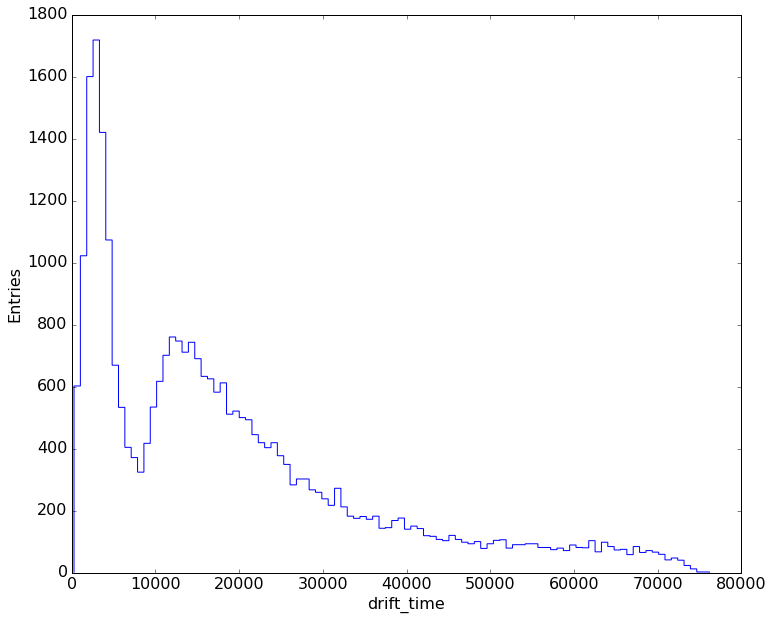

In [62]:
drift_time = xdata['drift_time'].values
plt.hist(drift_time,
          # range=(0,1e5),
           bins=100,
           histtype='step',
)
plt.xlabel('drift_time')
plt.ylabel('Entries')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

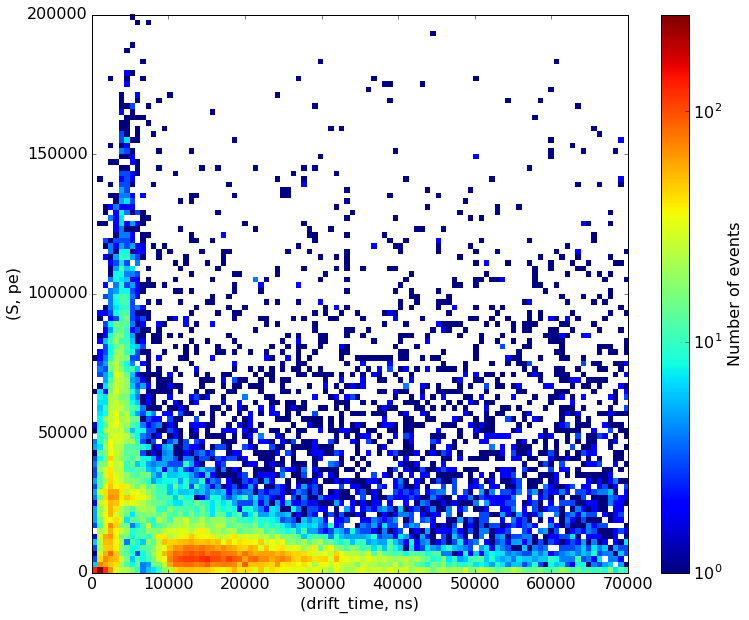

In [95]:
plt.hist2d(drift_time, s2,
           range=((0,70000), (0,200000)),
           bins=100, 
           norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
)
plt.colorbar(label='Number of events')
plt.xlabel('(drift_time, ns)')
plt.ylabel('(S, pe)')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

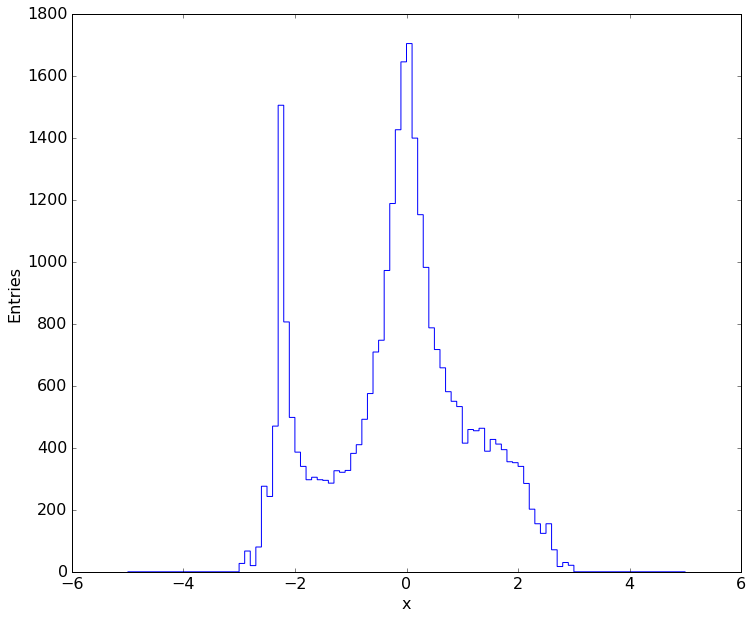

In [64]:
x = xdata['x'].values
plt.hist(x,
           range=(-5,5),
           bins=100,
           histtype='step',
)
plt.xlabel('x')
plt.ylabel('Entries')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

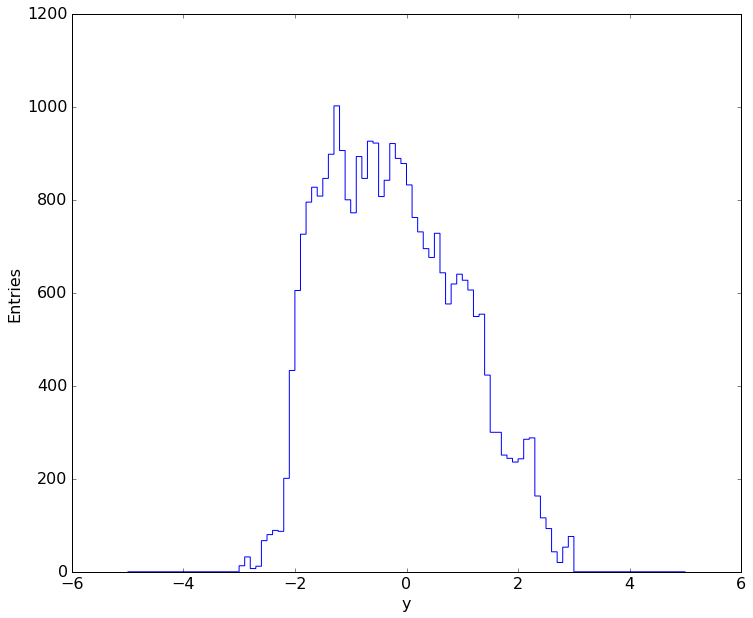

In [65]:
y = xdata['y'].values
plt.hist(y,
           range=(-5,5),
           bins=100,
           histtype='step',
)
plt.xlabel('y')
plt.ylabel('Entries')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

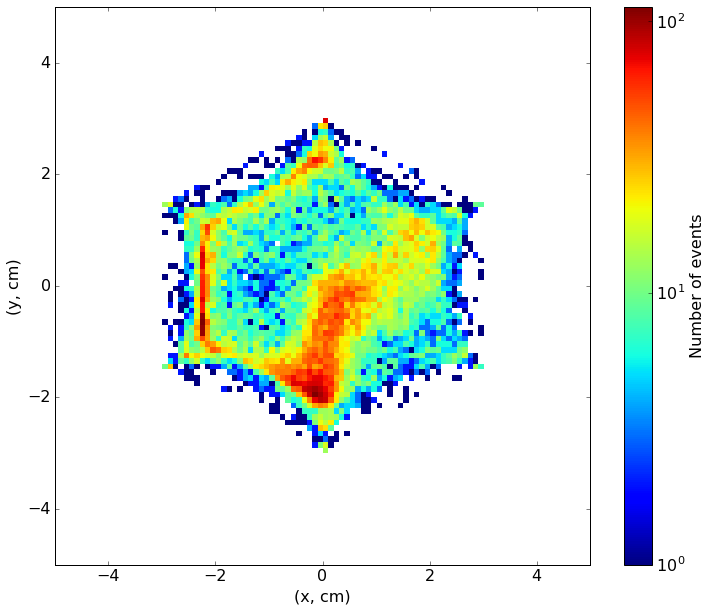

In [66]:
plt.hist2d(x, y,
           range=((-5,5), (-5,5)),
           bins=100, 
           norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
)
plt.colorbar(label='Number of events')
plt.xlabel('(x, cm)')
plt.ylabel('(y, cm)')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()